In [83]:
import pandas as pd
import numpy as np

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [86]:
df.replace({"sentiment":{"positive":1,"negative":0}}, inplace= True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [87]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [88]:
df.duplicated().sum()

418

In [89]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [90]:
df["review"] = df["review"].str.lower()

In [91]:
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
5,"probably my all-time favorite movie, a story o...",1
6,i sure would like to see a resurrection of a u...,1
7,"this show was an amazing, fresh & innovative i...",0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [92]:
import re

def clean_text(text):
    text_no_urls = re.sub(r'http\S+|www\.\S+', '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text_no_urls)
    return cleaned_text

df['review'] = df['review'].apply(clean_text)

In [93]:
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
5,probably my alltime favorite movie a story of ...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative ide...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [94]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')# Download stopwords if not already done
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(remove_stopwords)

In [96]:
df.head(10)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea 70s first a...,0
8,encouraged positive comments film looking forw...,0
9,like original gut wrenching laughter like movi...,1


In [114]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.5, random_state=42)

<Axes: >

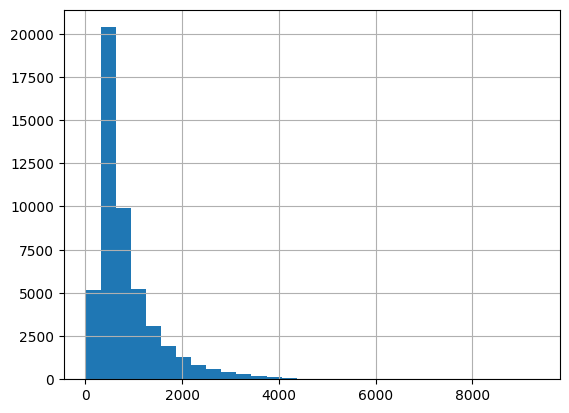

In [115]:
df['review'].str.len().hist(bins=30)

In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [117]:
# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['review'])

In [118]:
# Convert texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_data['review'])
test_sequences = tokenizer.texts_to_sequences(test_data['review'])

In [119]:
# Pad sequences to the same length
x_train = pad_sequences(train_sequences, maxlen=200)
x_test = pad_sequences(test_sequences, maxlen=200)

In [120]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
x = df['review']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_tfidf)

In [122]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8829283049309267


In [123]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [125]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(preprocess_text)


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].values


In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [129]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8822224463043259
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [130]:
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']